In [587]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import CategoricalDtype

In [588]:
data = pd.read_csv("studentInfo.csv") # veri setimizi data değişkenine atıyoruz

## Veri İncelemeleri

In [589]:
data # veri setimizi kontrol ediyoruz

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [590]:
data.head() # ilk 5 veri

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [591]:
data.info() # veri kaybımız yok, veri tipleri kontol edildi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


## Unique değerler kontrol ediliyor

In [592]:
code_module = data["code_module"].unique()
code_presentation = data["code_presentation"].unique()
gender = data["gender"].unique()
region = data["region"].unique()
highest_education = data["highest_education"].unique()
imd_band = data["imd_band"].unique()
age_band = data["age_band"].unique()
num_of_prev_attempts = data["num_of_prev_attempts"].unique()
disability = data["disability"].unique()
final_result = data["final_result"].unique()

df1 = pd.DataFrame({'code_module': code_module})
df2 = pd.DataFrame({'code_presentation': code_presentation})
df3 = pd.DataFrame({'region': region})
df4 = pd.DataFrame({'highest_education': highest_education})
df5 = pd.DataFrame({'imd_band': imd_band})
df6 = pd.DataFrame({'age_band': age_band})
df7 = pd.DataFrame({'num_of_prev_attempts': num_of_prev_attempts})
df8 = pd.DataFrame({'disability': disability})
df9 = pd.DataFrame({'final_result': final_result})

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

result = pd.concat(frames, axis=1)

result # unique değişkenleri kontrol ediyoruz.

,code_module,code_presentation,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result
0,AAA,2013J,East Anglian Region,HE Qualification,90-100%,55<=,0.0,N,Pass
1,BBB,2014J,Scotland,A Level or Equivalent,20-30%,35-55,1.0,Y,Withdrawn
2,CCC,2013B,North Western Region,Lower Than A Level,30-40%,0-35,2.0,NaN,Fail
3,DDD,2014B,South East Region,Post Graduate Qualification,50-60%,NaN,4.0,NaN,Distinction
4,EEE,NaN,West Midlands Region,No Formal quals,80-90%,NaN,3.0,NaN,NaN
5,FFF,NaN,Wales,NaN,70-80%,NaN,5.0,NaN,NaN
6,GGG,NaN,North Region,NaN,?,NaN,6.0,NaN,NaN
7,NaN,NaN,South Region,NaN,60-70%,NaN,NaN,NaN,NaN
8,NaN,NaN,Ireland,NaN,40-50%,NaN,NaN,NaN,NaN
9,NaN,NaN,South West Region,NaN,10-20,NaN,NaN,NaN,NaN


## Veri Görselleştirme ve Sayısal Değerlerin Tespit Edilmesi

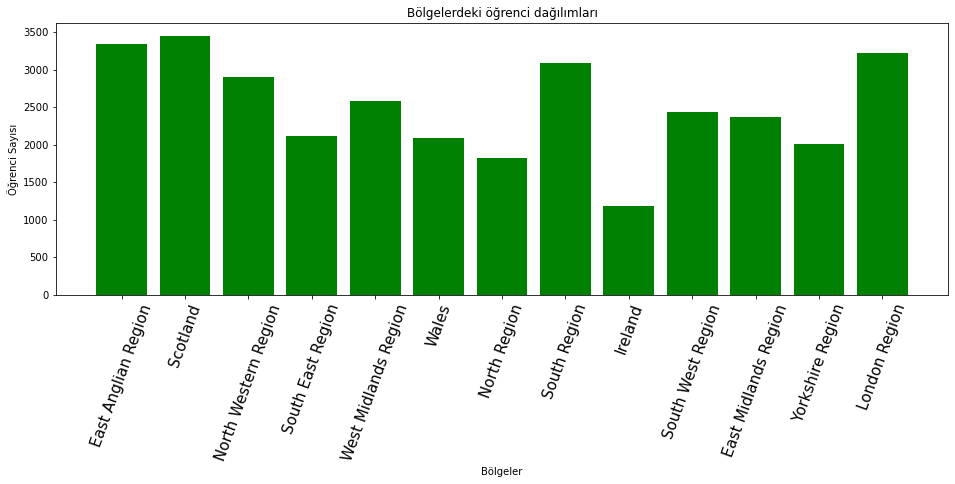

In [593]:
plt.figure(figsize=(16,5))
list = data["region"].unique()
counts = []
elemanlar = []
for eleman in list:
    dataYeni = data[data["region"] == eleman]
    counts.append(dataYeni["region"].value_counts().sum())
    elemanlar.append(eleman)
    
plt.bar(elemanlar, counts, color='green')
plt.xlabel("Bölgeler")
plt.ylabel("Öğrenci Sayısı")
plt.title("Bölgelerdeki öğrenci dağılımları")
plt.xticks(rotation=70, fontsize = 15)
plt.show() # # Bölgelerdeki öğrenci dağılımları

In [594]:
data["region"].value_counts() # bölgelere göre öğrenci sayısı, küçükten büyüğe doğru.

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

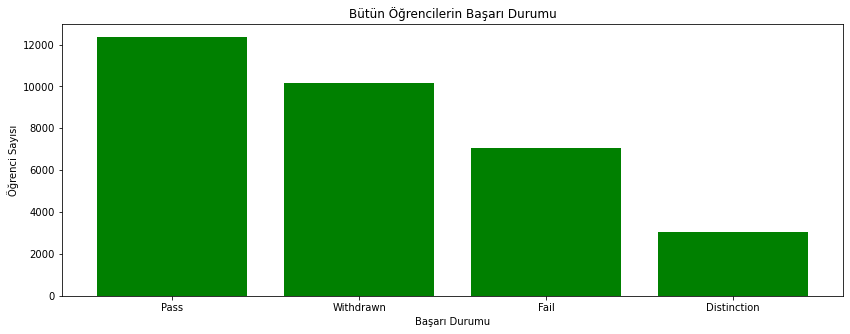

In [595]:
plt.figure(figsize=(14,5))
list = data["final_result"].unique()
counts = []
elemanlar = []
for eleman in list:
    dataYeni = data[data["final_result"] == eleman]
    counts.append(dataYeni["final_result"].value_counts().sum())
    elemanlar.append(eleman)
    
plt.bar(elemanlar, counts, color='green')
plt.xlabel("Başarı Durumu")
plt.ylabel("Öğrenci Sayısı")
plt.title("Bütün Öğrencilerin Başarı Durumu")
plt.show() # finallerin sonuçlarının grafiksel gösterimi

In [596]:
data["final_result"].value_counts() # Bütün Öğrencilerin Başarı Durumu sayısal değerler

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

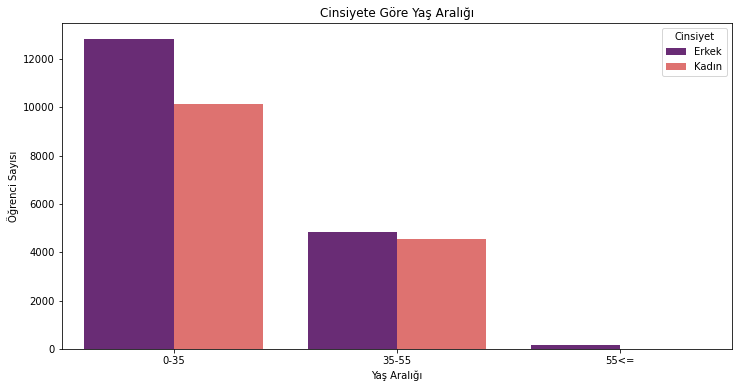

In [597]:
age_band_kategori = ["0-35", "35-55", "55<="]
data.age_band = data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'gender', data = data, palette = 'magma')

ax.set_title('Cinsiyete Göre Yaş Aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Cinsiyet")
for t, l in zip(legend.texts,("Erkek", "Kadın")):
    t.set_text(l) # cinsiyete göre yaş aralığı

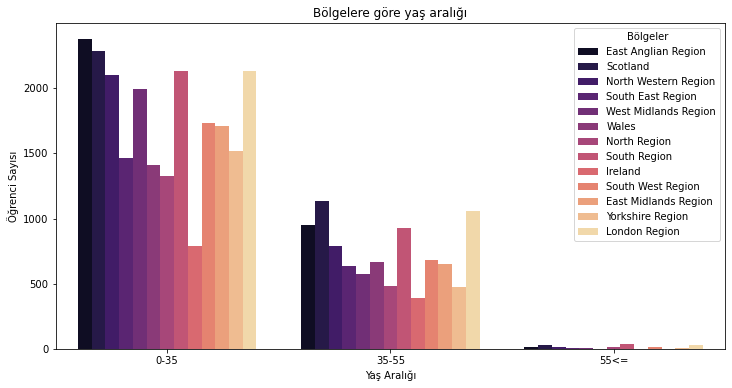

In [598]:
age_band_kategori = ["0-35", "35-55", "55<="]
data.age_band = data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'region', data = data, palette = 'magma')

ax.set_title('Bölgelere göre yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Bölgeler") # Bölgelere göre yaş aralığı

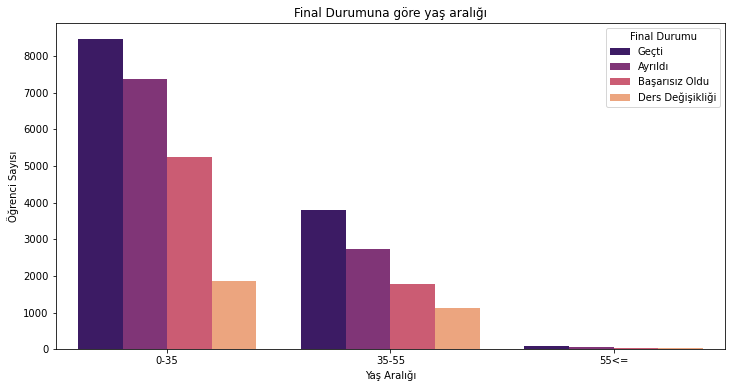

In [599]:
age_band_kategori = ["0-35", "35-55", "55<="]
data.age_band = data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'final_result', data = data, palette = 'magma')

ax.set_title('Final Durumuna göre yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Final Durumu") 
for t, l in zip(legend.texts,("Geçti", "Ayrıldı", "Başarısız Oldu", "Ders Değişikliği")):
    t.set_text(l) # Final Durumuna göre yaş aralığı

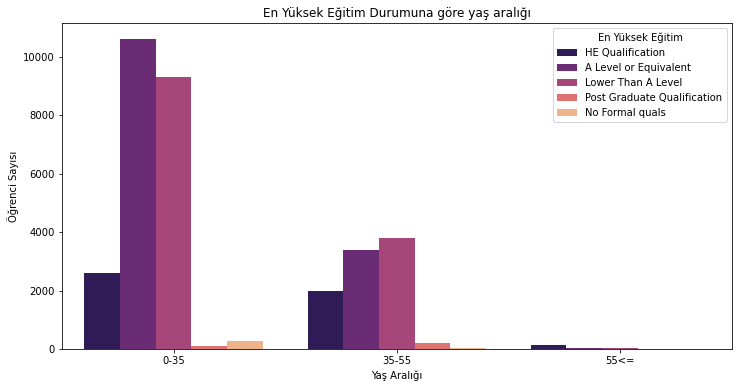

In [600]:
age_band_kategori = ["0-35", "35-55", "55<="]
data.age_band = data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'highest_education', data = data, palette = 'magma')

ax.set_title('En Yüksek Eğitim Durumuna göre yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("En Yüksek Eğitim") # En Yüksek Eğitim Durumuna göre yaş aralığı

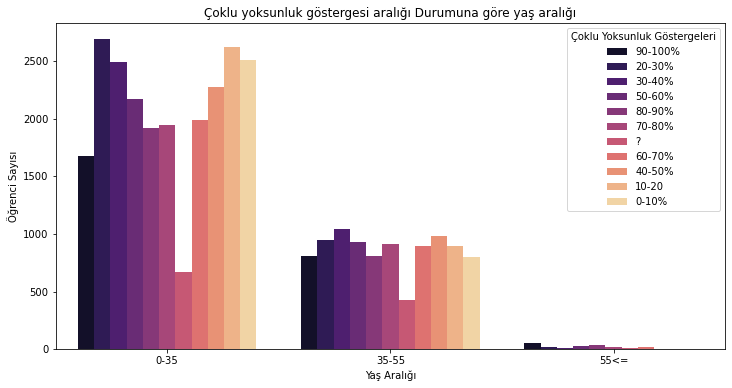

In [601]:
age_band_kategori = ["0-35", "35-55", "55<="]
data.age_band = data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'imd_band', data = data, palette = 'magma')

ax.set_title('Çoklu yoksunluk göstergesi aralığı Durumuna göre yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Çoklu Yoksunluk Göstergeleri") # Çoklu yoksunluk göstergesi aralığı Durumuna göre yaş aralığı

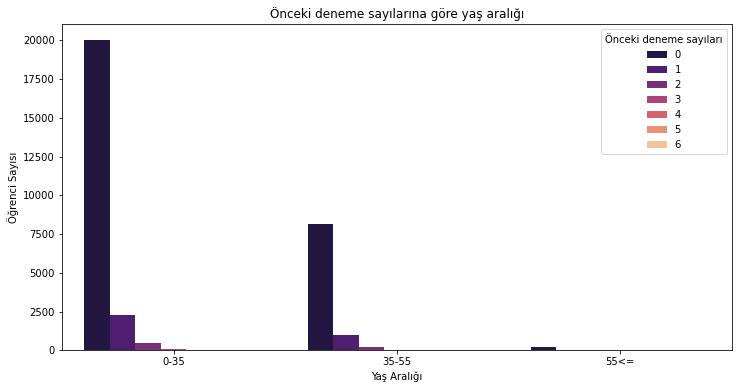

In [602]:
age_band_kategori = ["0-35", "35-55", "55<="]
data.age_band = data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'num_of_prev_attempts', data = data, palette = 'magma')

ax.set_title('Önceki deneme sayılarına göre yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Önceki deneme sayıları") # Önceki deneme sayılarına göre yaş aralığı

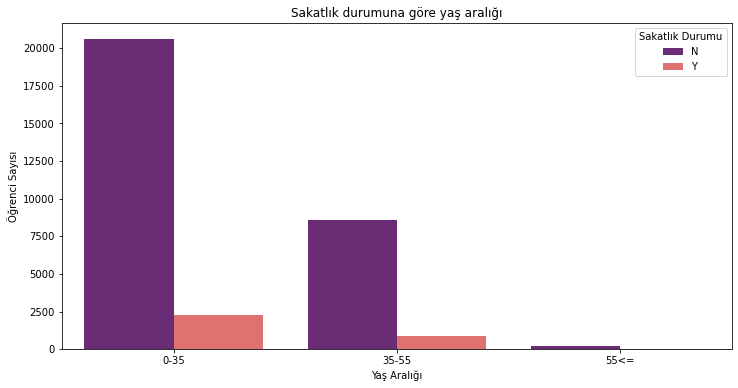

In [603]:
age_band_kategori = ["0-35", "35-55", "55<="]
data.age_band = data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'disability', data = data, palette = 'magma')

ax.set_title('Sakatlık durumuna göre yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Sakatlık Durumu") # Sakatlık durumuna göre yaş aralığı

## Dersi Geçenlerin Dataseti

In [604]:
pass_data = data[data["final_result"] == "Pass"] # dersi geçenlerin dataseti
pass_data["final_result"].value_counts() # dersi geçenlerin sayısal verisi

Pass    12361
Name: final_result, dtype: int64

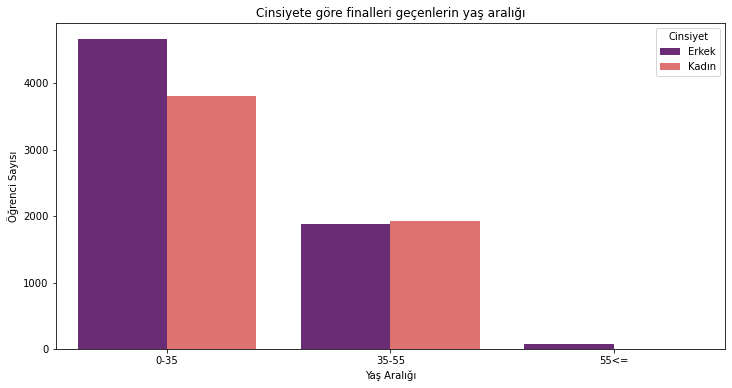

In [606]:
age_band_kategori = ["0-35", "35-55", "55<="]
pass_data.age_band = pass_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'gender', data = pass_data, palette = 'magma')

ax.set_title('Cinsiyete göre finalleri geçenlerin yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Cinsiyet")
for t, l in zip(legend.texts,("Erkek", "Kadın")):
    t.set_text(l) # Cinsiyete göre finalleri geçenlerin  yaş aralığı

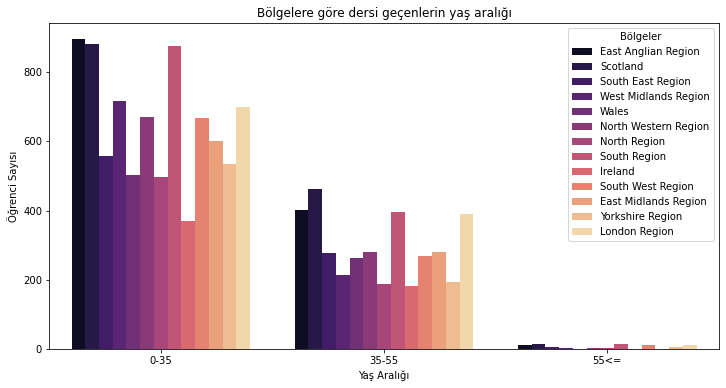

In [607]:
age_band_kategori = ["0-35", "35-55", "55<="]
pass_data.age_band = pass_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'region', data = pass_data, palette = 'magma')

ax.set_title('Bölgelere göre dersi geçenlerin yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Bölgeler") # Bölgelere göre dersi geçenlerin yaş aralığı

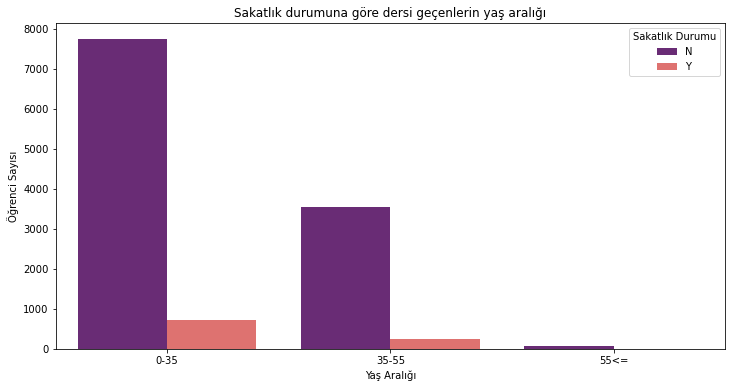

In [608]:
age_band_kategori = ["0-35", "35-55", "55<="]
pass_data.age_band = pass_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'disability', data = pass_data, palette = 'magma')

ax.set_title('Sakatlık durumuna göre dersi geçenlerin yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Sakatlık Durumu") # Sakatlık durumuna göre dersi geçenlerin yaş aralığı

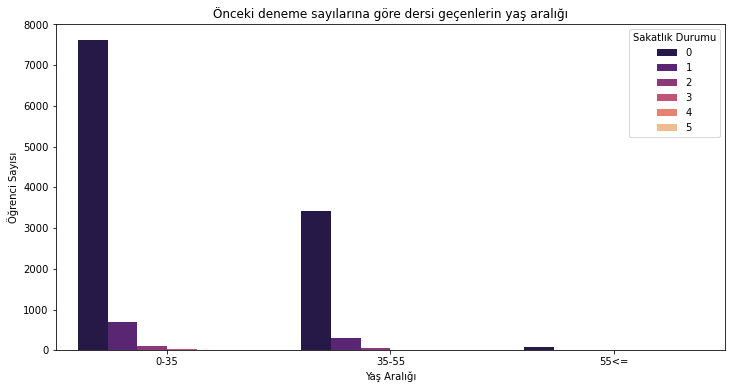

In [609]:
age_band_kategori = ["0-35", "35-55", "55<="]
pass_data.age_band = pass_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'num_of_prev_attempts', data = pass_data, palette = 'magma')

ax.set_title('Önceki deneme sayılarına göre dersi geçenlerin yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Sakatlık Durumu") # Önceki deneme sayılarına göre dersi geçenlerin yaş aralığı

## Dersi Bırakanların Dataseti

In [649]:
withdrawn_data = data[data["final_result"] == "Withdrawn"]
withdrawn_data["final_result"].value_counts() # dersi bırakanların datasetİ

Withdrawn    10156
Name: final_result, dtype: int64

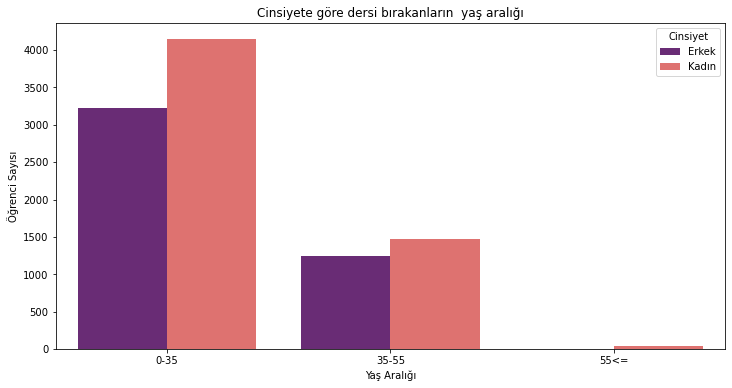

In [650]:
age_band_kategori = ["0-35", "35-55", "55<="]
withdrawn_data.age_band = withdrawn_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'gender', data = withdrawn_data, palette = 'magma')

ax.set_title('Cinsiyete göre dersi bırakanların  yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Cinsiyet")
for t, l in zip(legend.texts,("Erkek", "Kadın")):
    t.set_text(l) # Cinsiyete göre dersi bırakanların  yaş aralığı

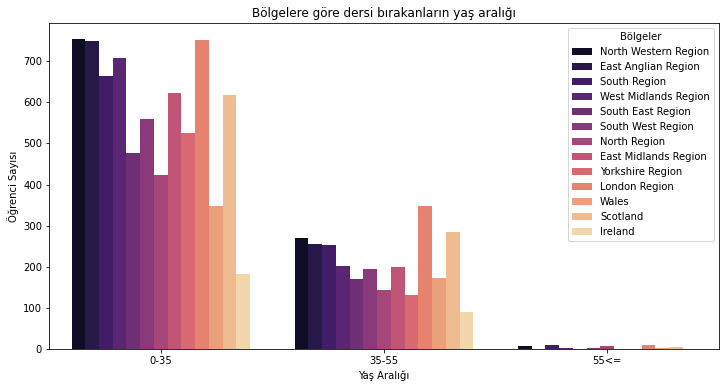

In [651]:
age_band_kategori = ["0-35", "35-55", "55<="]
withdrawn_data.age_band = withdrawn_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'region', data = withdrawn_data, palette = 'magma')

ax.set_title('Bölgelere göre dersi bırakanların yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Bölgeler") # Bölgelere göre dersi bırakanların yaş aralığı

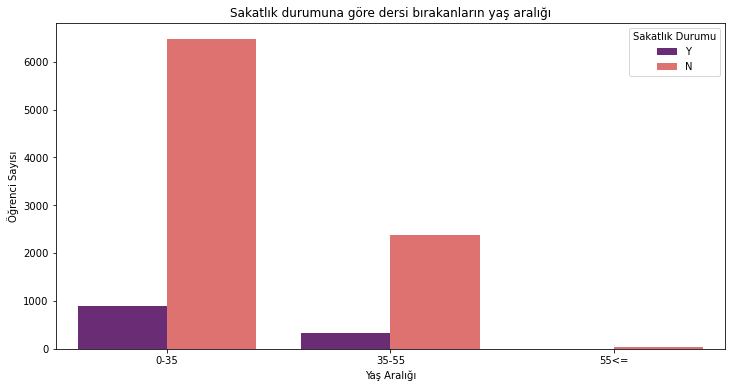

In [652]:
age_band_kategori = ["0-35", "35-55", "55<="]
withdrawn_data.age_band = withdrawn_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'disability', data = withdrawn_data, palette = 'magma')

ax.set_title('Sakatlık durumuna göre dersi bırakanların yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right') # legend position
legend.set_title("Sakatlık Durumu") # Sakatlık durumuna göre dersi bırakanların yaş aralığı

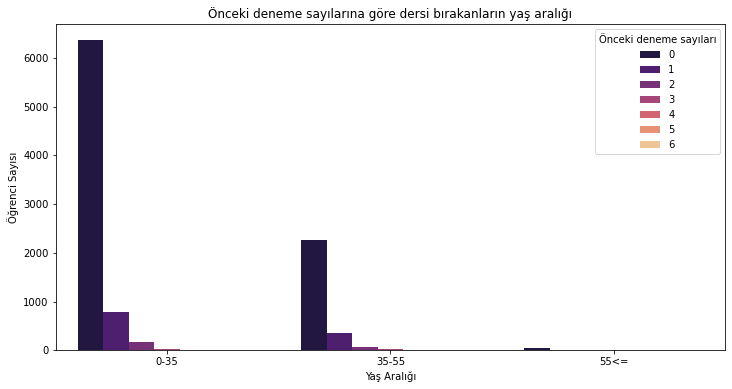

In [653]:
age_band_kategori = ["0-35", "35-55", "55<="]
withdrawn_data.age_band = withdrawn_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'num_of_prev_attempts', data = withdrawn_data, palette = 'magma')

ax.set_title('Önceki deneme sayılarına göre dersi bırakanların yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Önceki deneme sayıları") # Önceki deneme sayılarına göre dersi bırakanların yaş aralığı

## Dersten Başarısız Olanların Dataseti

In [668]:
fail_data = data[data["final_result"] == "Fail"]
fail_data["final_result"].value_counts() # dersten başarısız olanların datasetİ

Fail    7052
Name: final_result, dtype: int64

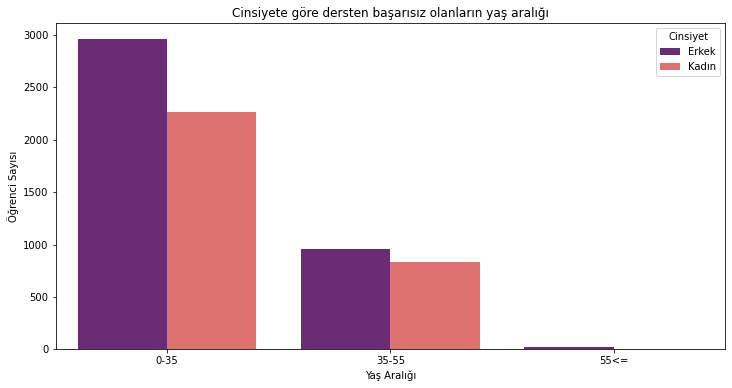

In [655]:
age_band_kategori = ["0-35", "35-55", "55<="]
fail_data.age_band = fail_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'gender', data = fail_data, palette = 'magma')

ax.set_title('Cinsiyete göre dersten başarısız olanların yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Cinsiyet")
for t, l in zip(legend.texts,("Erkek", "Kadın")):
    t.set_text(l) # Cinsiyete göre dersten başarısız olanların yaş aralığı

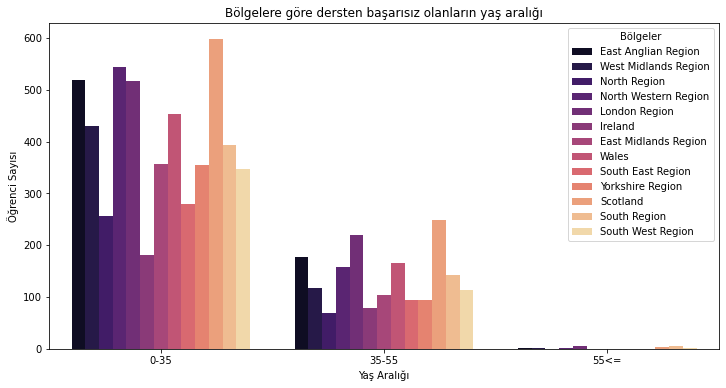

In [656]:
age_band_kategori = ["0-35", "35-55", "55<="]
fail_data.age_band = fail_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'region', data = fail_data, palette = 'magma')

ax.set_title('Bölgelere göre dersten başarısız olanların yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Bölgeler") # Bölgelere göre dersten başarısız olanların yaş aralığı

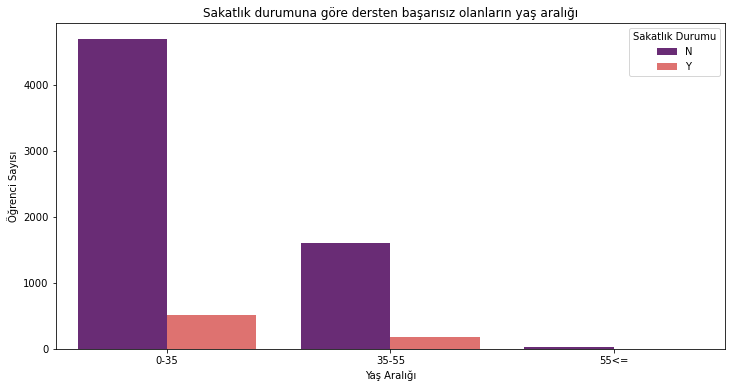

In [657]:
age_band_kategori = ["0-35", "35-55", "55<="]
fail_data.age_band = fail_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'disability', data = fail_data, palette = 'magma')

ax.set_title('Sakatlık durumuna göre dersten başarısız olanların yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Sakatlık Durumu") # Sakatlık durumuna göre dersten başarısız olanların yaş aralığı

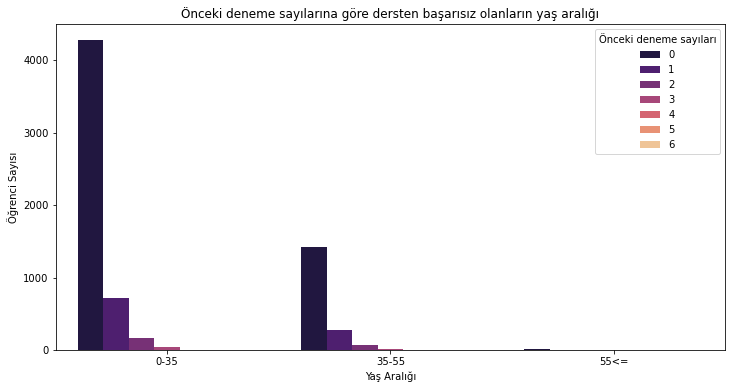

In [658]:
age_band_kategori = ["0-35", "35-55", "55<="]
fail_data.age_band = fail_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'num_of_prev_attempts', data = fail_data, palette = 'magma')

ax.set_title('Önceki deneme sayılarına göre dersten başarısız olanların yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Önceki deneme sayıları") # Önceki deneme sayılarına göre dersten başarısız olanların yaş aralığı

## Ders Değiştirenlerin Dataseti

In [659]:
distinction_data = data[data["final_result"] == "Distinction"]
distinction_data["final_result"].value_counts() # Ders değiştirenlerin datasetİ

Distinction    3024
Name: final_result, dtype: int64

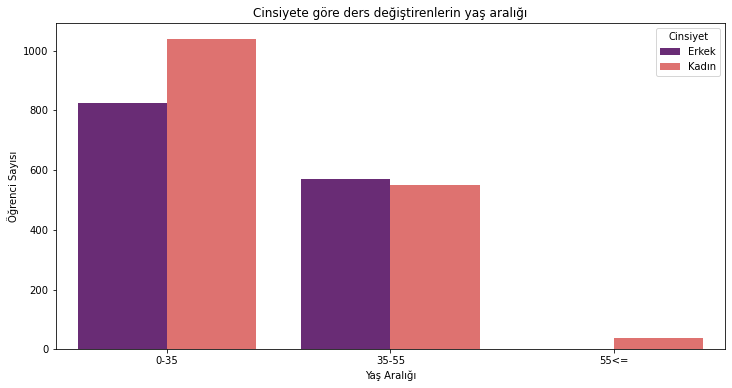

In [660]:
age_band_kategori = ["0-35", "35-55", "55<="]
distinction_data.age_band = distinction_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'gender', data = distinction_data, palette = 'magma')

ax.set_title('Cinsiyete göre ders değiştirenlerin yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Cinsiyet")
for t, l in zip(legend.texts,("Erkek", "Kadın")):
    t.set_text(l) # Cinsiyete göre ders değiştirenlerin yaş aralığı

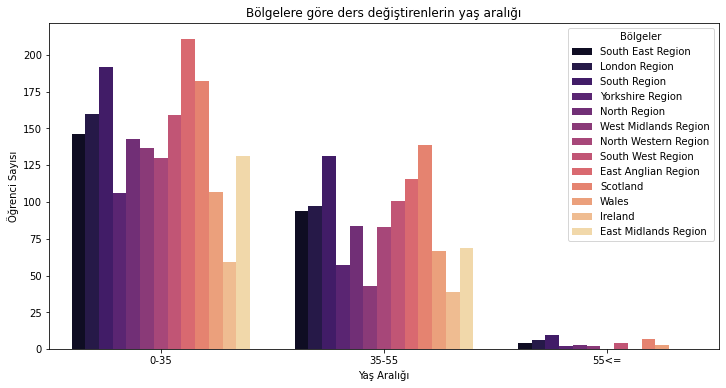

In [661]:
age_band_kategori = ["0-35", "35-55", "55<="]
distinction_data.age_band = distinction_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'region', data = distinction_data, palette = 'magma')

ax.set_title('Bölgelere göre ders değiştirenlerin yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Bölgeler") # Bölgelere göre ders değiştirenlerin yaş aralığı

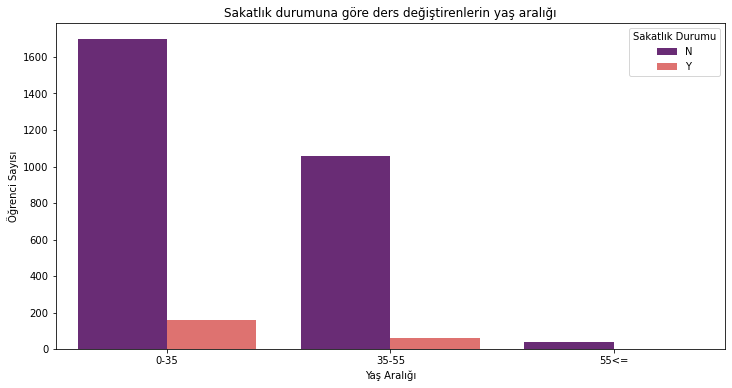

In [662]:
age_band_kategori = ["0-35", "35-55", "55<="]
distinction_data.age_band = distinction_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'disability', data = distinction_data, palette = 'magma')

ax.set_title('Sakatlık durumuna göre ders değiştirenlerin yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Sakatlık Durumu") # Sakatlık durumuna göre ders değiştirenlerin yaş aralığı

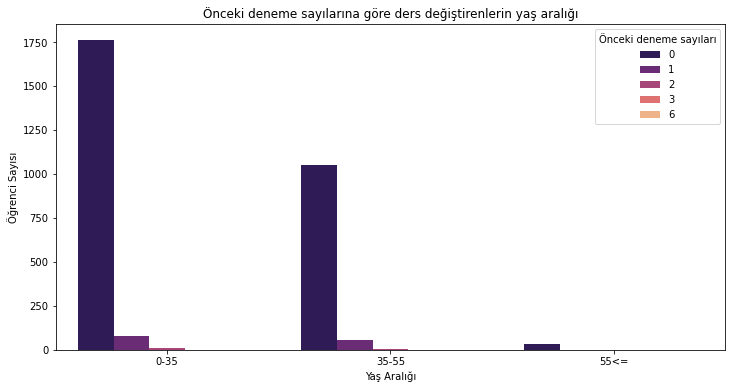

In [663]:
age_band_kategori = ["0-35", "35-55", "55<="]
distinction_data.age_band = distinction_data.age_band.astype(CategoricalDtype(categories = age_band_kategori, ordered = True))

plt.subplots(figsize = (12,6))

ax = sns.countplot(x = 'age_band', hue = 'num_of_prev_attempts', data = distinction_data, palette = 'magma')
ax.set_title('Önceki deneme sayılarına göre ders değiştirenlerin yaş aralığı')
ax.set_ylabel('Öğrenci Sayısı')
ax.set_xlabel('Yaş Aralığı')
legend = ax.legend(loc='upper right')
legend.set_title("Önceki deneme sayıları") # Önceki deneme sayılarına göre ders değiştirenlerin yaş aralığı

## Bölgelere göre kız ve erkeklerin dersi geçme durumları

## Dersi geçenler için

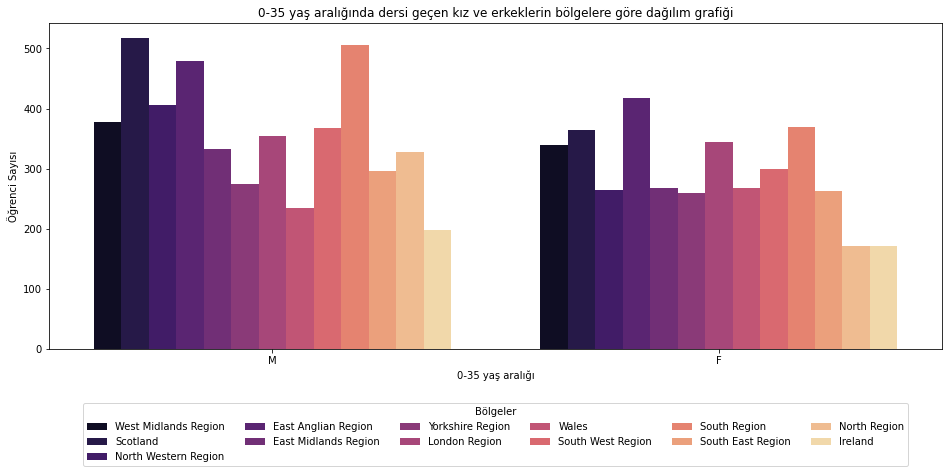

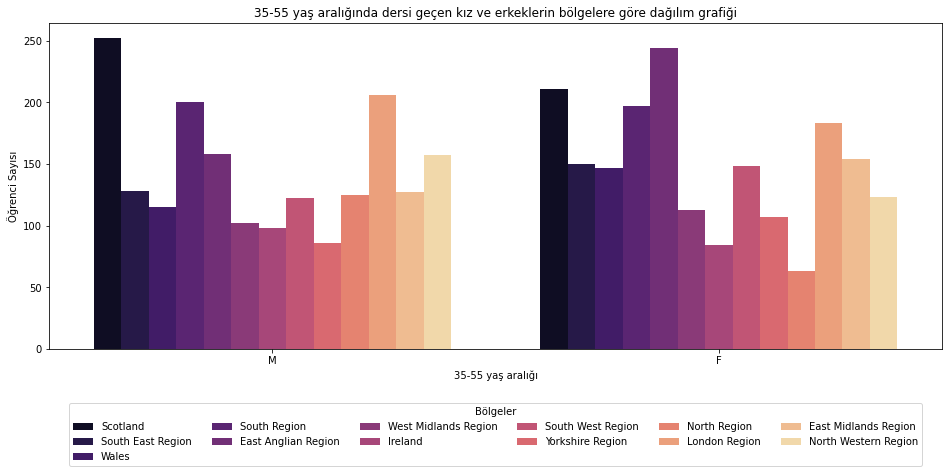

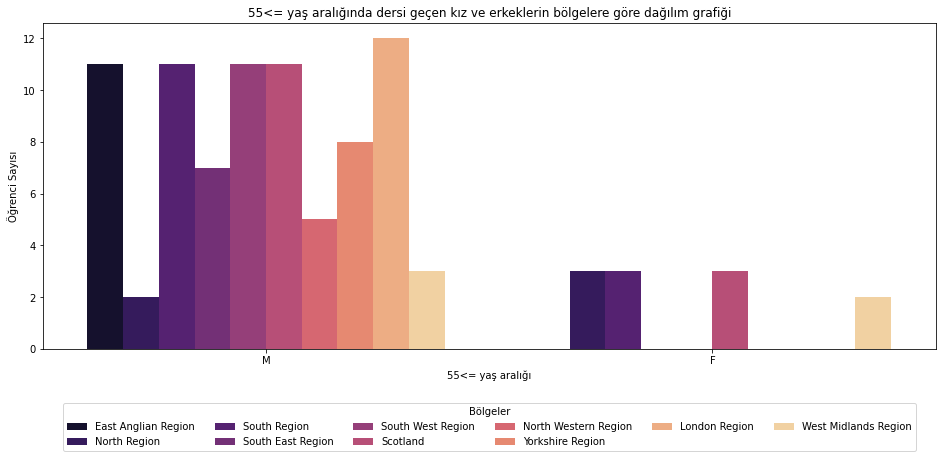

In [638]:
age_band_kategori = ["0-35", "35-55", "55<="]
gender_kategori = ["M","F"]


pass_data.gender = pass_data.gender.astype(CategoricalDtype(categories = gender_kategori, ordered = True))
for age in age_band_kategori:
    plt.subplots(figsize = (16,6))
    ax = sns.countplot(x = 'gender', hue = 'region', data = pass_data[pass_data["age_band"] == age], palette = 'magma')
    ax.set_title(age + " yaş aralığında dersi geçen kız ve erkeklerin bölgelere göre dağılım grafiği")
    ax.set_ylabel('Öğrenci Sayısı')
    ax.set_xlabel(age + " yaş aralığı")
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    legend.set_title("Bölgeler") # Dersi geçen kız ve erkeklerin bütün yaş aralıklarında- bölgelere göre dağılım grafiği


## Dersi bırakanlar için

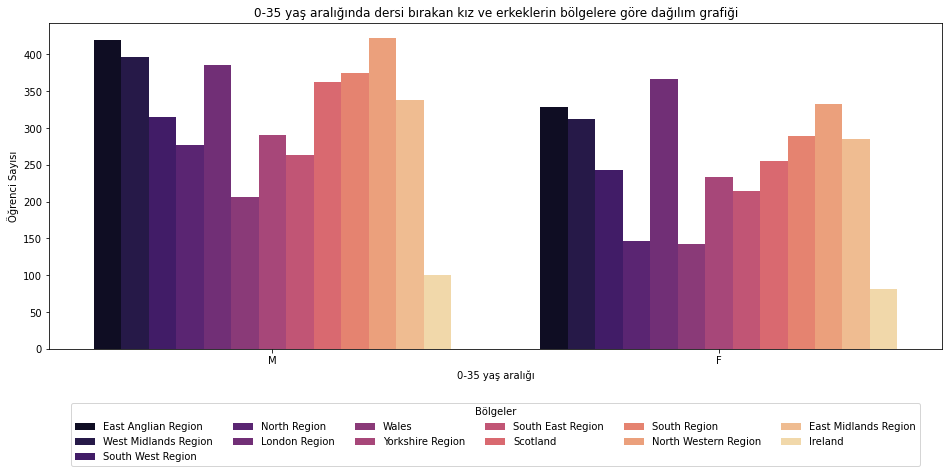

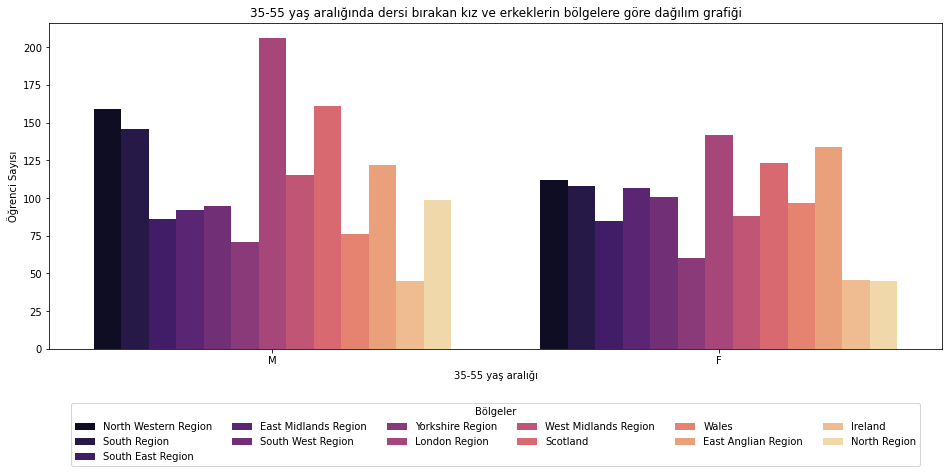

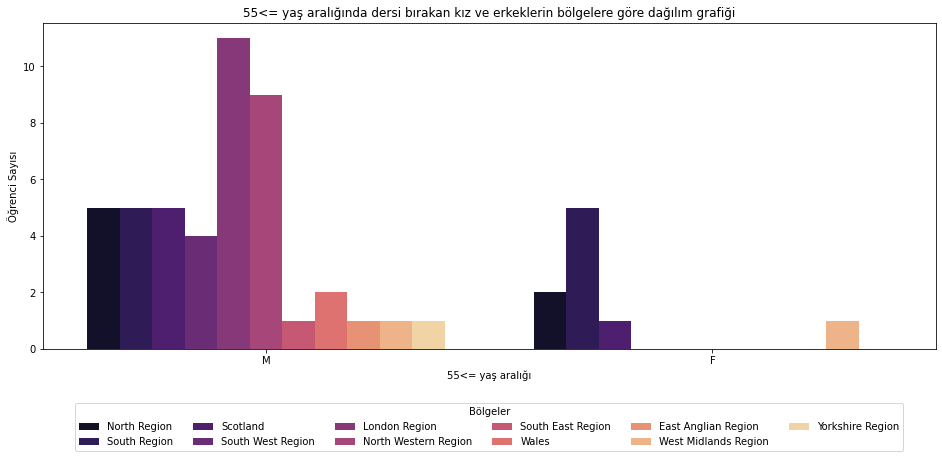

In [667]:
age_band_kategori = ["0-35", "35-55", "55<="]
gender_kategori = ["M","F"]


withdrawn_data.gender = withdrawn_data.gender.astype(CategoricalDtype(categories = gender_kategori, ordered = True))
for age in age_band_kategori:
    plt.subplots(figsize = (16,6))
    ax = sns.countplot(x = 'gender', hue = 'region', data = withdrawn_data[withdrawn_data["age_band"] == age], palette = 'magma')
    ax.set_title(age + " yaş aralığında dersi bırakan kız ve erkeklerin bölgelere göre dağılım grafiği")
    ax.set_ylabel('Öğrenci Sayısı')
    ax.set_xlabel(age + " yaş aralığı")
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    legend.set_title("Bölgeler") # Dersi bırakan kız ve erkeklerin bütün yaş aralıklarında- bölgelere göre dağılım grafiği

# Dersten başarısız olanlar için#

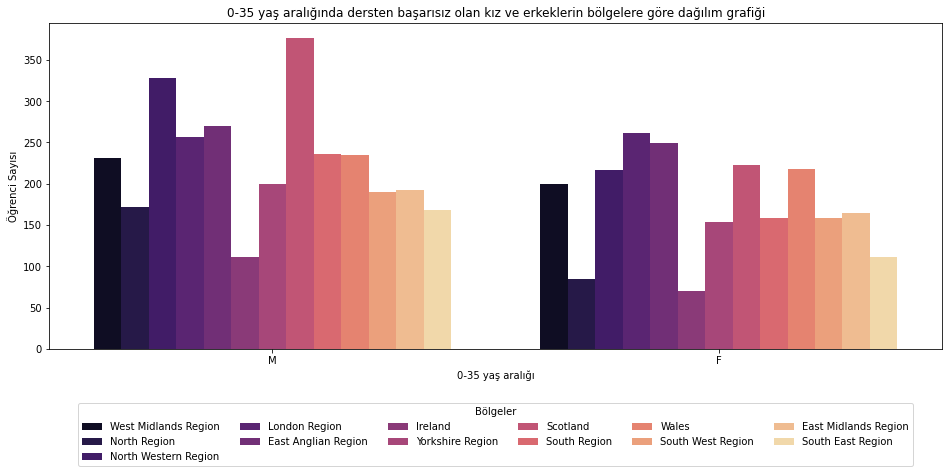

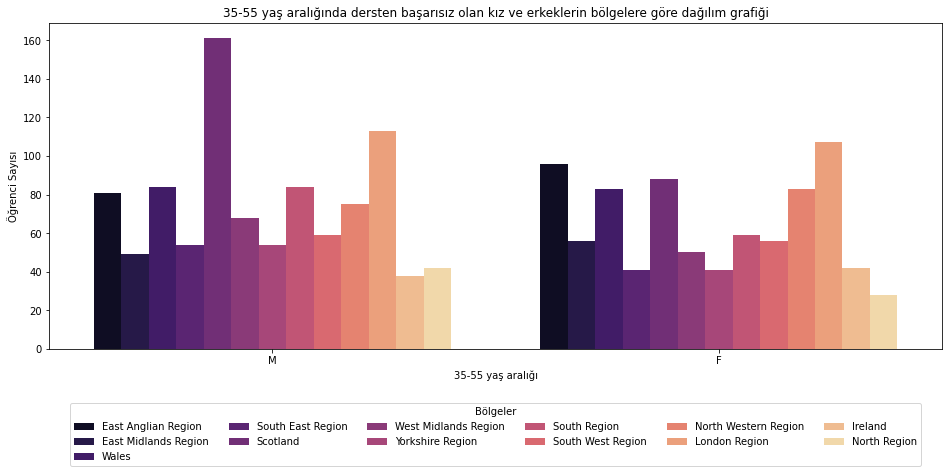

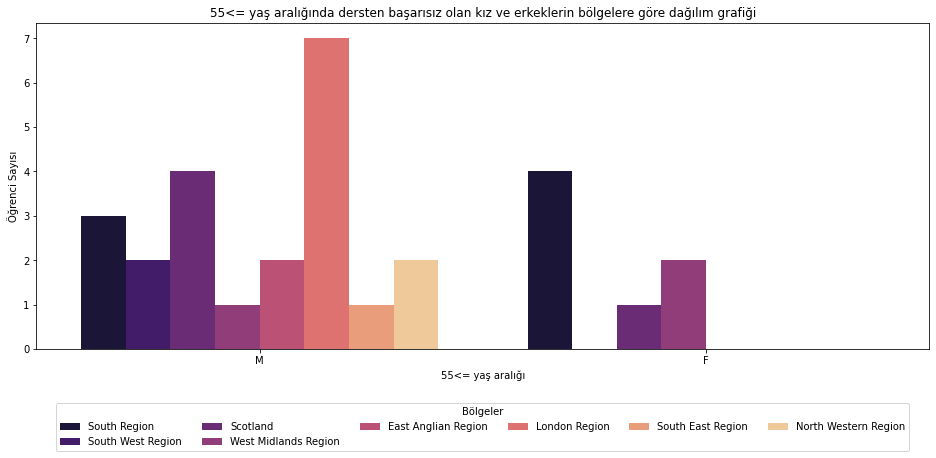

In [670]:
age_band_kategori = ["0-35", "35-55", "55<="]
gender_kategori = ["M","F"]


fail_data.gender = fail_data.gender.astype(CategoricalDtype(categories = gender_kategori, ordered = True))
for age in age_band_kategori:
    plt.subplots(figsize = (16,6))
    ax = sns.countplot(x = 'gender', hue = 'region', data = fail_data[fail_data["age_band"] == age], palette = 'magma')
    ax.set_title(age + " yaş aralığında dersten başarısız olan kız ve erkeklerin bölgelere göre dağılım grafiği")
    ax.set_ylabel('Öğrenci Sayısı')
    ax.set_xlabel(age + " yaş aralığı")
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    legend.set_title("Bölgeler") # Dersten başarısız olanlan kız ve erkeklerin bütün yaş aralıklarında- bölgelere göre dağılım grafiği

## Dersi değiştirme durumuna göre

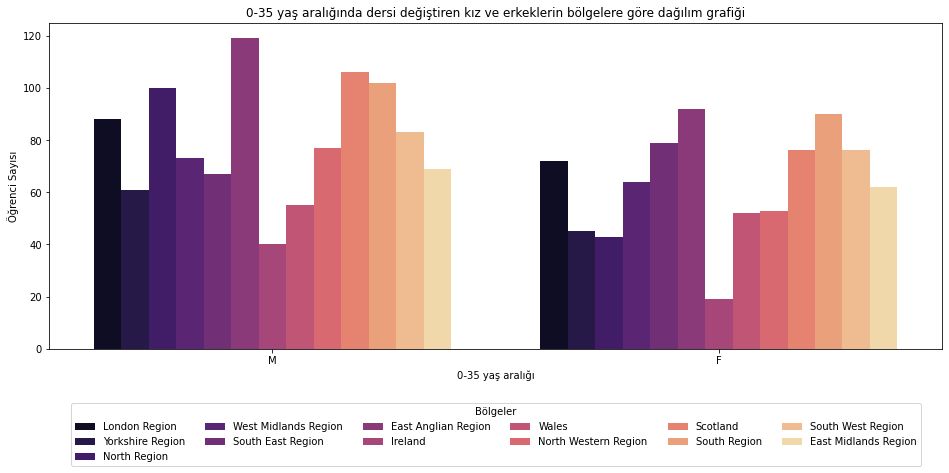

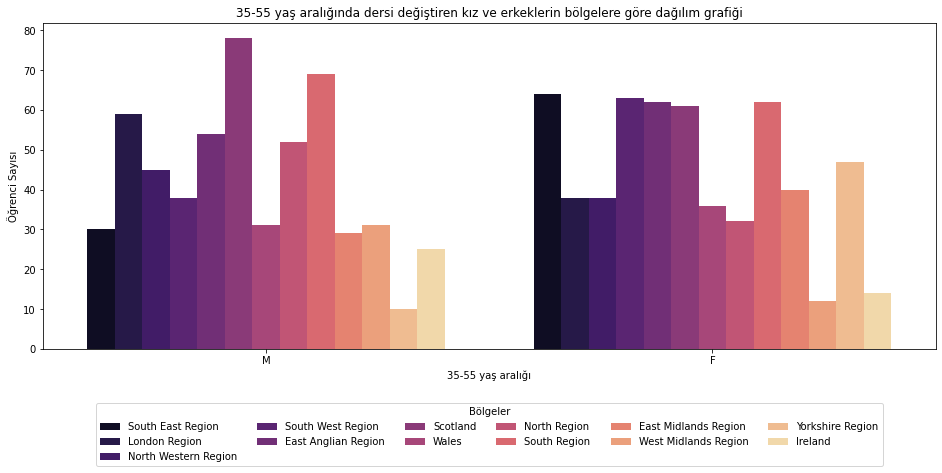

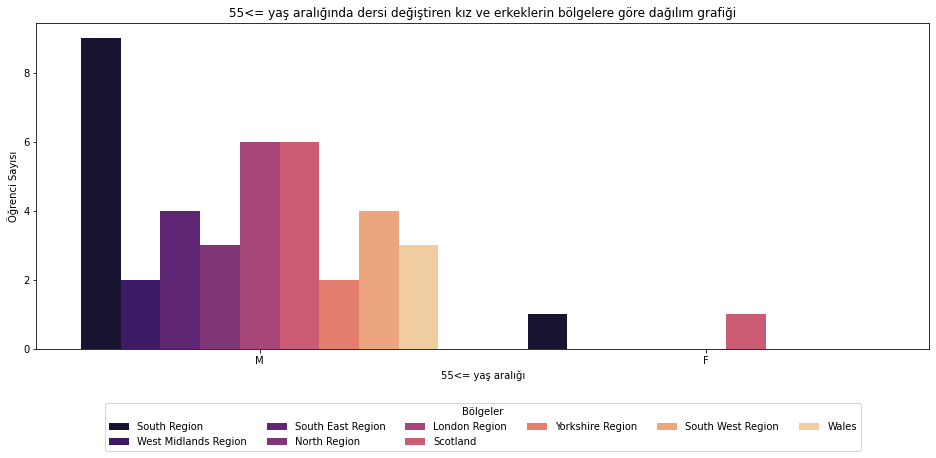

In [675]:
age_band_kategori = ["0-35", "35-55", "55<="]
gender_kategori = ["M","F"]


distinction_data.gender = distinction_data.gender.astype(CategoricalDtype(categories = gender_kategori, ordered = True))
for age in age_band_kategori:
    plt.subplots(figsize = (16,6))
    ax = sns.countplot(x = 'gender', hue = 'region', data = distinction_data[distinction_data["age_band"] == age], palette = 'magma')
    ax.set_title(age + " yaş aralığında dersi değiştiren kız ve erkeklerin bölgelere göre dağılım grafiği")
    ax.set_ylabel('Öğrenci Sayısı')
    ax.set_xlabel(age + " yaş aralığı")
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    legend.set_title("Bölgeler") # Dersi değiştiren kız ve erkeklerin bütün yaş aralıklarında- bölgelere göre dağılım grafiği

## En yüksek eğitimlere göre kız ve erkeklerin dersi geçme durumları

## Dersi geçenler için

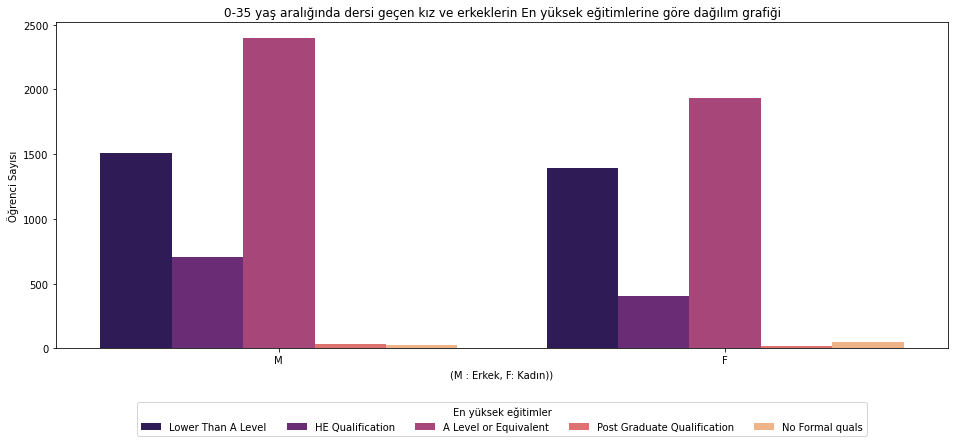

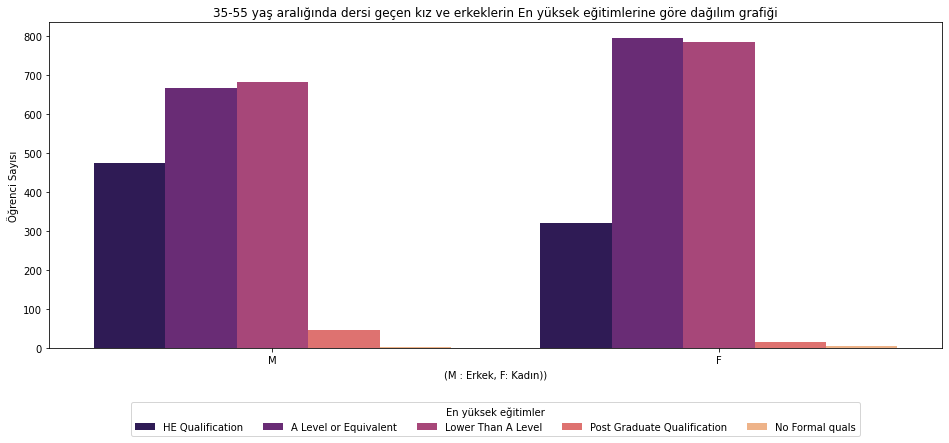

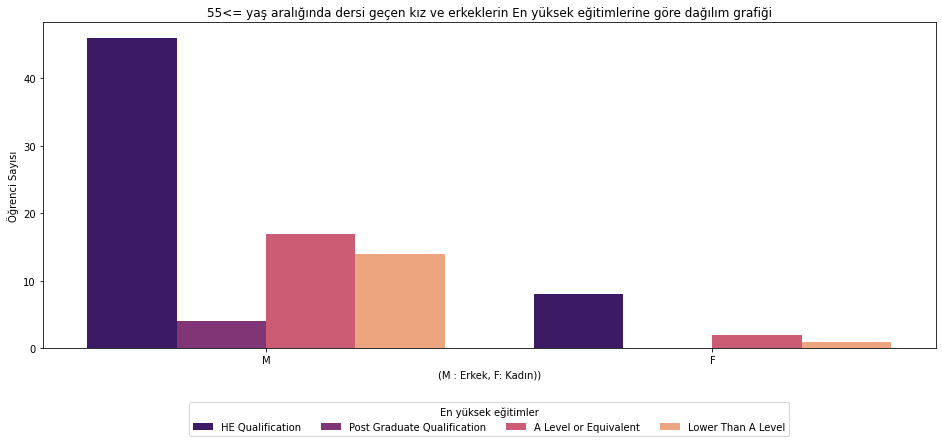

In [681]:
age_band_kategori = ["0-35", "35-55", "55<="]
gender_kategori = ["M","F"]


pass_data.gender = pass_data.gender.astype(CategoricalDtype(categories = gender_kategori, ordered = True))
for age in age_band_kategori:
    plt.subplots(figsize = (16,6))
    ax = sns.countplot(x = 'gender', hue = 'highest_education', data = pass_data[pass_data["age_band"] == age], palette = 'magma')
    ax.set_title(age + " yaş aralığında dersi geçen kız ve erkeklerin En yüksek eğitimlerine göre dağılım grafiği")
    ax.set_ylabel('Öğrenci Sayısı')
    ax.set_xlabel("(M : Erkek, F: Kadın))")
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    legend.set_title("En yüksek eğitimler") # Dersi geçen kız ve erkeklerin bütün yaş aralıklarında- En yüksek eğitimlerine göre dağılım grafiği

# Dersi bırakanlar için

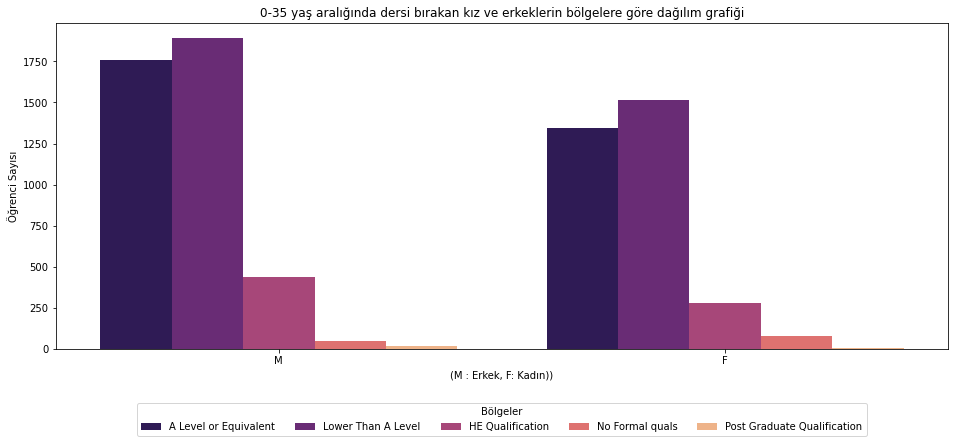

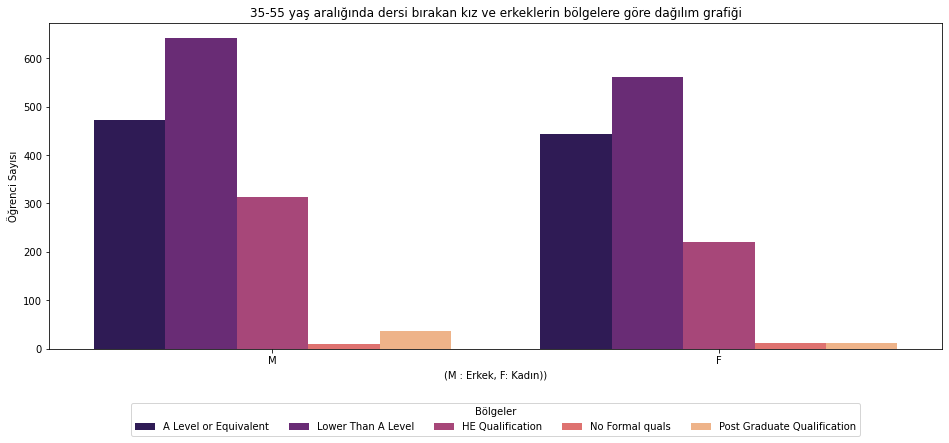

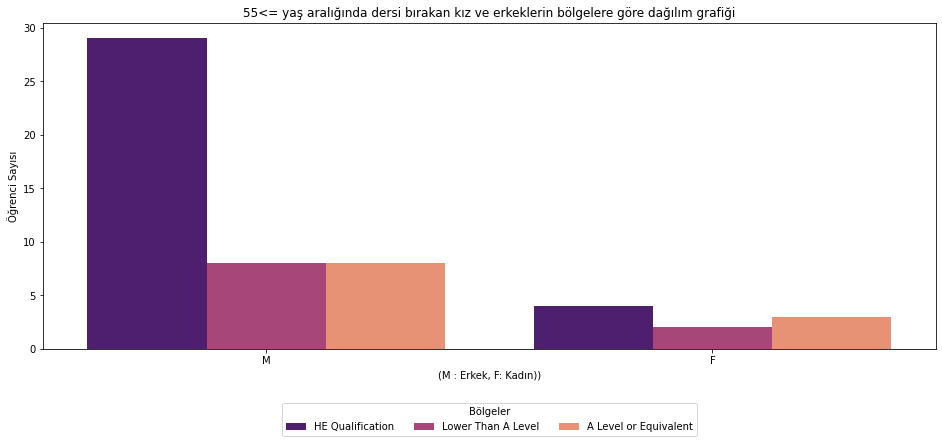

In [682]:
age_band_kategori = ["0-35", "35-55", "55<="]
gender_kategori = ["M","F"]


withdrawn_data.gender = withdrawn_data.gender.astype(CategoricalDtype(categories = gender_kategori, ordered = True))
for age in age_band_kategori:
    plt.subplots(figsize = (16,6))
    ax = sns.countplot(x = 'gender', hue = 'highest_education', data = withdrawn_data[withdrawn_data["age_band"] == age], palette = 'magma')
    ax.set_title(age + " yaş aralığında dersi bırakan kız ve erkeklerin bölgelere göre dağılım grafiği")
    ax.set_ylabel('Öğrenci Sayısı')
    ax.set_xlabel("(M : Erkek, F: Kadın))")
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    legend.set_title("Bölgeler") # Dersi bırakan kız ve erkeklerin bütün yaş aralıklarında- En yüksek eğitimlerine göre dağılım grafiği

## Dersten başarısız olanlar için

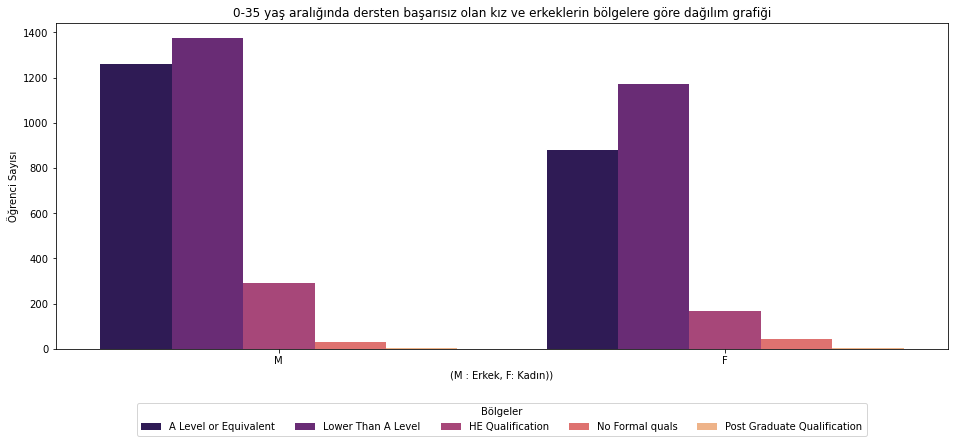

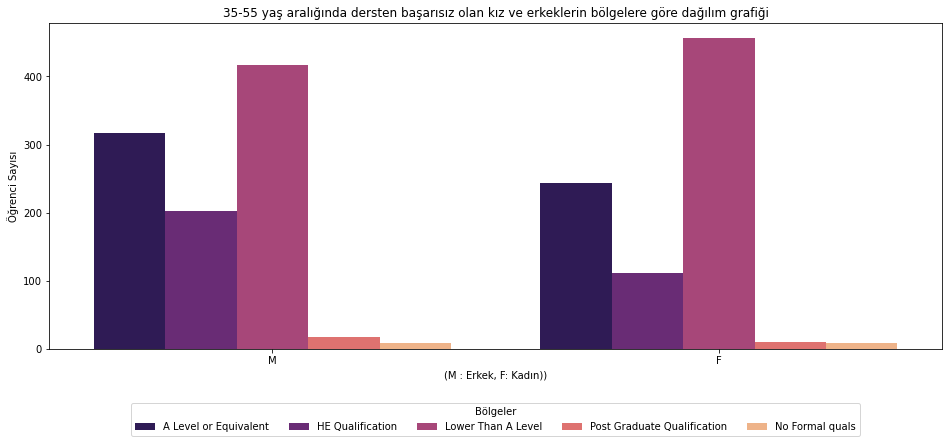

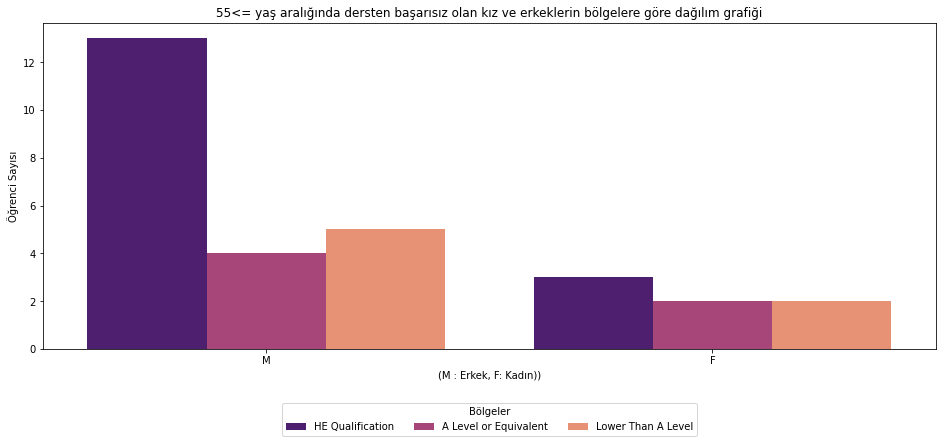

In [683]:
age_band_kategori = ["0-35", "35-55", "55<="]
gender_kategori = ["M","F"]


fail_data.gender = fail_data.gender.astype(CategoricalDtype(categories = gender_kategori, ordered = True))
for age in age_band_kategori:
    plt.subplots(figsize = (16,6))
    ax = sns.countplot(x = 'gender', hue = 'highest_education', data = fail_data[fail_data["age_band"] == age], palette = 'magma')
    ax.set_title(age + " yaş aralığında dersten başarısız olan kız ve erkeklerin bölgelere göre dağılım grafiği")
    ax.set_ylabel('Öğrenci Sayısı')
    ax.set_xlabel("(M : Erkek, F: Kadın))")
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    legend.set_title("Bölgeler") # Dersten başarısız olanlan kız ve erkeklerin bütün yaş aralıklarında- En yüksek eğitimlerine göre dağılım grafiği

## Dersi değiştirme durumuna göre

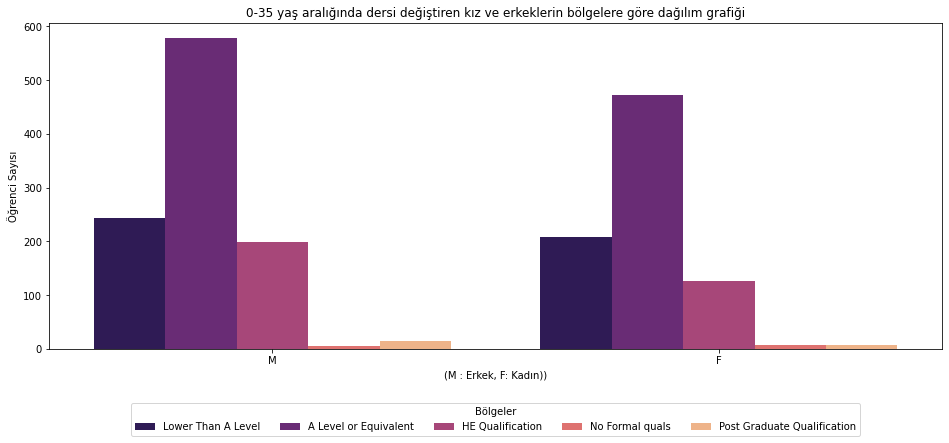

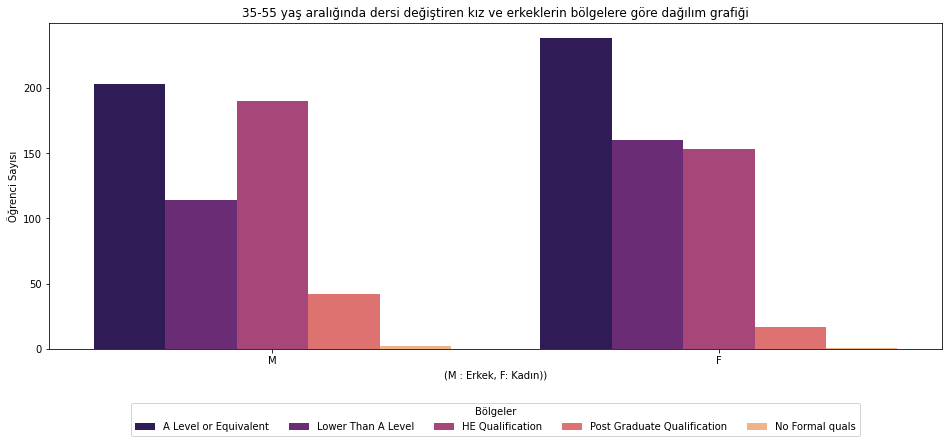

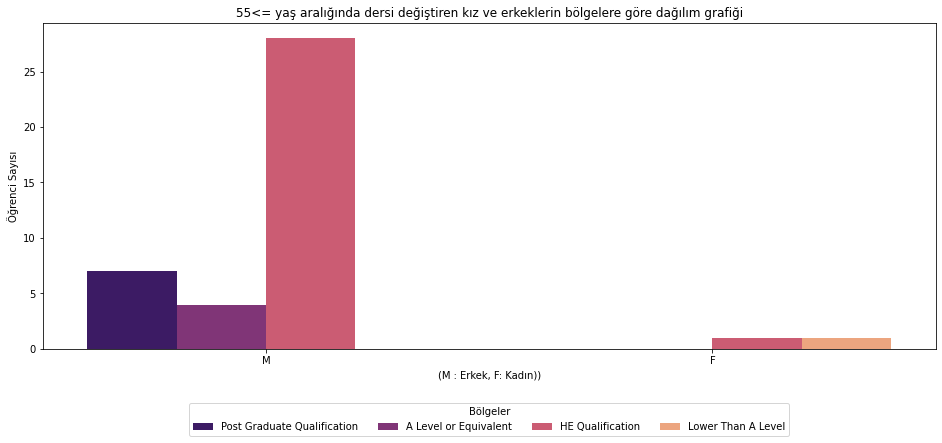

In [692]:
age_band_kategori = ["0-35", "35-55", "55<="]
gender_kategori = ["M","F"]


distinction_data.gender = distinction_data.gender.astype(CategoricalDtype(categories = gender_kategori, ordered = True))
for age in age_band_kategori:
    plt.subplots(figsize = (16,6))
    ax = sns.countplot(x = 'gender', hue = 'highest_education', data = distinction_data[distinction_data["age_band"] == age], palette = 'magma')
    ax.set_title(age + " yaş aralığında dersi değiştiren kız ve erkeklerin bölgelere göre dağılım grafiği")
    ax.set_ylabel('Öğrenci Sayısı')
    ax.set_xlabel("(M : Erkek, F: Kadın))")
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    legend.set_title("Bölgeler") # Dersi değiştiren kız ve erkeklerin bütün yaş aralıklarında- En yüksek eğitimlerine göre dağılım grafiği